# Probabilidad de Victoria del Atacante

In [1]:
#Librerias
import numpy as np
import pandas as pd
import markovchain
import math
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Especifica el nombre del archivo Excel
Probabilidad_Teorica_Densidad = 'Probabilidad_Teorica_Densidad.xlsx'

# Carga el archivo de Excel en un DataFrame
df = pd.read_excel(Probabilidad_Teorica_Densidad)

# Muestra el DataFrame
df

,Numero_Atacantes,Numero_Defensores,Probabilidad_Victoria_Atacante,Probabilidad_Victoria_Defensor,Número_Esperado_Ataques,Desviación_Número_Esperado_Ataques,Sobrevivientes Esperados Atacante,Desviación de Sobrevivientes Esperados Atacante,Sobrevivientes Esperados Defensor,Desviación de Sobrevivientes Esperados Defensor,Sobrevivientes x Probabilidad de Victoria Atacante,Derivada_Parcial_Numero_Defensores
0,1,1,0.417000,0.583000,1.000000,0.000000,0.417000,0.493063,0.583000,0.493063,0.173889,NaN
1,1,2,0.311082,0.688918,1.746000,0.435298,0.311082,0.462936,0.942918,0.749549,0.096772,0.417000
2,1,3,0.232067,0.767933,2.302516,0.847939,0.232067,0.422152,1.465417,1.104961,0.053855,0.311082
3,1,4,0.173122,0.826878,2.717677,1.241345,0.173122,0.378353,2.109201,1.458796,0.029971,0.232067
4,1,5,0.129149,0.870851,3.027387,1.596567,0.129149,0.335365,2.843464,1.780735,0.016679,0.173122
...,...,...,...,...,...,...,...,...,...,...,...,...
3715,0,56,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,0.000000,0.000000,0.035157
3716,0,57,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.025675
3717,0,58,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,0.000000,0.038983
3718,0,59,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,59.000000,0.000000,0.000000,0.028166


In [5]:
import pandas as pd
import plotly.graph_objects as go

# Creamos un DataFrame de ejemplo
dfpb = df

# Creamos una tabla pivote a partir del DataFrame
table = pd.pivot_table(dfpb, values='Probabilidad_Victoria_Atacante', index='Numero_Atacantes', columns='Numero_Defensores')

# Creamos una malla de coordenadas x y z a partir de la tabla pivote
x, y = table.index.values, table.columns.values
X, Y = np.meshgrid(x, y)
Z = table.values.T

# Creamos la superficie 3D a partir de la malla de coordenadas
fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z)])

# Configuramos el diseño de la figura
fig.update_layout(
    title='Superficie 3D de probabilidad de Victoria del atacante',
    autosize=False,
    width=800,
    height=800,
    scene=dict(
        xaxis=dict(title='Numero_Atacantes'),
        yaxis=dict(title='Numero_Defensores'),
        zaxis=dict(title='Probabilidad_Victoria_Atacante'),
        aspectratio=dict(x=1, y=1, z=0.7),
        camera_eye=dict(x=1.2, y=1.2, z=0.6),
        dragmode='orbit'
    )
)

# Mostramos la figura
fig.show()

In [6]:
import pandas as pd
import plotly.graph_objects as go

# Creamos un DataFrame de ejemplo
dfpb = df

# Creamos una tabla pivote a partir del DataFrame
table = pd.pivot_table(dfpb, values='Derivada_Parcial_Numero_Defensores', index='Numero_Atacantes', columns='Numero_Defensores')

# Creamos una malla de coordenadas x y z a partir de la tabla pivote
x, y = table.index.values, table.columns.values
X, Y = np.meshgrid(x, y)
Z = table.values.T

# Creamos la superficie 3D a partir de la malla de coordenadas
fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z)])

# Configuramos el diseño de la figura
fig.update_layout(
    title='Superficie 3D de Derivada_Parcial_Numero_Defensores',
    autosize=False,
    width=800,
    height=800,
    scene=dict(
        xaxis=dict(title='Numero_Atacantes'),
        yaxis=dict(title='Numero_Defensores'),
        zaxis=dict(title='Derivada_Parcial_Numero_Defensores'),
        aspectratio=dict(x=1, y=1, z=0.7),
        camera_eye=dict(x=1.2, y=1.2, z=0.6),
        dragmode='orbit'
    )
)

# Mostramos la figura
fig.show()

In [7]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Creamos un DataFrame de ejemplo
dfpb = df

# Creamos una tabla pivote a partir del DataFrame
table = pd.pivot_table(dfpb, values='Probabilidad_Victoria_Atacante', index='Numero_Atacantes', columns='Numero_Defensores')

# Creamos una malla de coordenadas x y z a partir de la tabla pivote
x, y = table.index.values, table.columns.values
X, Y = np.meshgrid(x, y)
Z = table.values.T

# Calculamos las derivadas parciales de la superficie con respecto a x e y
dZdx, dZdy = np.gradient(Z, x, y)

# Definimos el vector de dirección
direction = np.array([1, 1])

# Calculamos la derivada direccional en cada punto de la superficie
dZd_dir = direction[0] * dZdx + direction[1] * dZdy

# Crear la figura con la superficie 3D correspondiente a la derivada direccional
fig = go.Figure(data=[go.Surface(x=X, y=Y, z=dZd_dir, colorscale='RdBu')])

# Configurar el diseño de la figura
fig.update_layout(
    title='Derivada direccional respecto al vector (1,1) de la probabilidad de Victoria del atacante',
    autosize=False,
    width=800,
    height=800,
    scene=dict(
        xaxis=dict(title='Numero_Atacantes'),
        yaxis=dict(title='Numero_Defensores'),
        zaxis=dict(title='Derivada Direccional'),
        aspectratio=dict(x=1, y=1, z=0.7),
        camera_eye=dict(x=1.2, y=1.2, z=0.6),
        dragmode='orbit'
    )
)

# Mostrar la figura
fig.show()

In [8]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import scipy.stats as stats
import numpy as np

# Creamos un DataFrame de ejemplo
dfpb = df

# Creamos una tabla pivote a partir del DataFrame
table = pd.pivot_table(dfpb, values='Probabilidad_Victoria_Atacante', index='Numero_Atacantes', columns='Numero_Defensores')

def update_graph(defenders, std_dev):
    df_fijo = table[defenders]
    
    # Agregar la distribución normal acumulada
    defenders_mean = defenders
    defenders_std = std_dev  # Modifica el valor de la desviación estándar según tus necesidades
    x = np.linspace(df_fijo.index.min(), df_fijo.index.max(), 100)
    y = stats.norm.cdf(x, defenders_mean, defenders_std)
    
    # Crear la figura con dos subplots
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_fijo.index, y=df_fijo.values, mode='lines', name='Probabilidad de Victoria'))
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Distribución Normal Acumulada'))

    fig.update_layout(
        title='Probabilidad de Victoria del Atacante (Número de Defensores Fijo)',
        xaxis=dict(title='Numero_Atacantes'),
        yaxis=dict(title='Probabilidad_Victoria_Atacante')
    )
    fig.show()

defenders_slider = widgets.IntSlider(min=table.columns.min(), max=table.columns.max(), value=10, description='Defensores')
std_dev_slider = widgets.FloatSlider(min=0.1, max=10, value=5, description='Desviación Estándar')

# Crear el widget interactivo
widget = widgets.interactive(update_graph, defenders=defenders_slider, std_dev=std_dev_slider)

# Mostrar el deslizador y el gráfico
display(widget)

interactive(children=(IntSlider(value=10, description='Defensores', max=60), FloatSlider(value=5.0, descriptio…

In [9]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Creamos un DataFrame de ejemplo
dfpb = df

# Creamos una tabla pivote a partir del DataFrame
table = pd.pivot_table(dfpb, values='Probabilidad_Victoria_Atacante', index='Numero_Atacantes', columns='Numero_Defensores')

def update_graph(defenders):
    df_fijo = table[defenders]
    
    # Gráfica original
    fig = go.Figure(data=go.Scatter(x=df_fijo.index, y=df_fijo.values, mode='lines', name='Función original'))
    
    # Derivada de la gráfica original
    x = df_fijo.index
    y = df_fijo.values
    dy = np.gradient(y, x)  # Calcula la derivada
    fig.add_trace(go.Scatter(x=x, y=dy, mode='lines', name='Derivada'))
    
    fig.update_layout(
        title='Probabilidad de Victoria del Atacante (Número de Defensores Fijo)',
        xaxis=dict(title='Numero_Atacantes'),
        yaxis=dict(title='Probabilidad_Victoria_Atacante')
    )
    fig.show()

defenders_slider = widgets.IntSlider(min=table.columns.min(), max=table.columns.max(), value=10, description='Defensores')

# Crear el widget interactivo
widget = widgets.interactive(update_graph, defenders=defenders_slider)

# Mostrar el deslizador y el gráfico
display(widget)

interactive(children=(IntSlider(value=10, description='Defensores', max=60), Output()), _dom_classes=('widget-…

In [10]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from scipy.stats import norm

# Creamos un DataFrame de ejemplo
dfpb = df


# Creamos una tabla pivote a partir del DataFrame
table = pd.pivot_table(dfpb, values='Derivada_Parcial_Numero_Defensores', index='Numero_Atacantes', columns='Numero_Defensores')

def update_graph(defenders):
    df_fijo = table[defenders]
    
    # Gráfica original
   
    fig = go.Figure(data=go.Scatter(x=df_fijo.index, y=df_fijo.values, mode='lines', name='Función original'))
   
    
    # Ajuste de una distribución normal a la derivada
    mu, std = np.mean(y), np.std(y)
    x_fit = np.linspace(1, 60, 100)
    y_fit = norm.pdf(x_fit, mu, std)
    fig.add_trace(go.Scatter(x=x_fit, y=y_fit, mode='lines', name='Ajuste Normal'))
    
    fig.update_layout(
        title='Derivada_Parcial_Numero_Defensores (Número de Defensores Fijo)',
        xaxis=dict(title='Numero_Atacantes'),
        yaxis=dict(title='Derivada_Parcial_Numero_Defensores')
    )
    fig.show()
    
    print(f"Media del ajuste: {mu}")
    print(f"Desviación estándar del ajuste: {std}")

defenders_slider = widgets.IntSlider(min=table.columns.min(), max=table.columns.max(), value=10, description='Defensores')

# Crear el widget interactivo
widget = widgets.interactive(update_graph, defenders=defenders_slider)

# Mostrar el deslizador y el gráfico
display(widget)


interactive(children=(IntSlider(value=10, description='Defensores', max=60), Output()), _dom_classes=('widget-…

In [11]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from scipy.stats import norm

# Create an example DataFrame
dfpb = df

# Create a pivot table from the DataFrame
table = pd.pivot_table(dfpb, values='Derivada_Parcial_Numero_Defensores', index='Numero_Atacantes', columns='Numero_Defensores')

def update_graph(defenders):
    df_fijo = table[defenders]
    
    # Original graph
    fig = go.FigureWidget()
    fig.add_scatter(x=df_fijo.index, y=df_fijo.values, mode='lines', name='Función original')
   
    # Fit a normal distribution to the derivative
    mu, std = np.mean(df_fijo.values), np.std(df_fijo.values)
    x_fit = np.linspace(1, 60, 100)
    y_fit = norm.pdf(x_fit, mu, std)
    fig.add_scatter(x=x_fit, y=y_fit, mode='lines', name='Ajuste Normal')
    
    fig.update_layout(
        title='Derivada_Parcial_Numero_Defensores (Número de Defensores Fijo)',
        xaxis=dict(title='Numero_Atacantes'),
        yaxis=dict(title='Derivada_Parcial_Numero_Defensores')
    )
    fig.show()
    
    print(f"Media del ajuste: {mu}")
    print(f"Desviación estándar del ajuste: {std}")

defenders_slider = widgets.IntSlider(min=table.columns.min(), max=table.columns.max(), value=10, description='Defensores')

# Create the interactive widget
widget = widgets.interactive(update_graph, defenders=defenders_slider)

# Display the slider and the graph
display(widget)


interactive(children=(IntSlider(value=10, description='Defensores', max=60), Output()), _dom_classes=('widget-…

In [12]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from scipy.stats import norm

# Creamos un DataFrame de ejemplo
dfpb = df

def update_graph(defenders):
    # Creamos una tabla pivote a partir del DataFrame
    table = pd.pivot_table(dfpb, values='Derivada_Parcial_Numero_Defensores', index='Numero_Atacantes', columns='Numero_Defensores')

    df_fijo = table[defenders]
    
    # Gráfica original
    fig = go.Figure(data=go.Scatter(x=df_fijo.index, y=df_fijo.values, mode='lines', name='Función original'))
    
    # Calcular los parámetros de ajuste de la distribución normal
    media = np.dot(table.index, table[defenders].values)-1
    
    desviacion_estandar = np.sqrt(np.dot((table.index - media) ** 2, table[defenders].values))
    
    # Ajuste de una distribución normal a la derivada
    x_fit = np.linspace(1, 60, 100)
    y_fit = norm.pdf(x_fit, media, desviacion_estandar)
    
    # Actualizar los datos de la curva de ajuste normal
    if 'Ajuste Normal' in [trace.name for trace in fig.data]:
        fig.update_traces(x=x_fit, y=y_fit, selector=dict(name='Ajuste Normal'))
    else:
        fig.add_trace(go.Scatter(x=x_fit, y=y_fit, mode='lines', name='Ajuste Normal'))
    
    fig.update_layout(
        title='Derivada_Parcial_Numero_Defensores (Número de Defensores Fijo)',
        xaxis=dict(title='Numero_Atacantes'),
        yaxis=dict(title='Derivada_Parcial_Numero_Defensores')
    )
    fig.show()
    
    print(f"Media del ajuste: {media}")
    print(f"Desviación estándar del ajuste: {desviacion_estandar}")
    print(df_fijo)
    
defenders_slider = widgets.IntSlider(min=dfpb['Numero_Defensores'].min(), max=dfpb['Numero_Defensores'].max(), value=10, description='Defensores')

# Crear el widget interactivo
widget = widgets.interactive(update_graph, defenders=defenders_slider)

# Mostrar el deslizador y el gráfico
display(widget)



interactive(children=(IntSlider(value=10, description='Defensores', max=60), Output()), _dom_classes=('widget-…

In [13]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from scipy.stats import norm, kstest

# Creamos un DataFrame de ejemplo
dfpb = df

def update_graph(defenders):
    # Creamos una tabla pivote a partir del DataFrame
    table = pd.pivot_table(dfpb, values='Derivada_Parcial_Numero_Defensores', index='Numero_Atacantes', columns='Numero_Defensores')

    df_fijo = table[defenders]
    
    # Gráfica original
    fig = go.Figure(data=go.Scatter(x=df_fijo.index, y=df_fijo.values, mode='lines', name='Función original'))
    
    # Calcular los parámetros de ajuste de la distribución normal
    media = np.dot(table.index, table[defenders].values)
    
    desviacion_estandar = np.sqrt(np.dot((table.index - media) ** 2, table[defenders].values))
    
    # Ajuste de una distribución normal a la derivada
    x_fit = np.linspace(1, 60, 100)
    y_fit = norm.pdf(x_fit, media, desviacion_estandar)
    
    # Actualizar los datos de la curva de ajuste normal
    if 'Ajuste Normal' in [trace.name for trace in fig.data]:
        fig.update_traces(x=x_fit, y=y_fit, selector=dict(name='Ajuste Normal'))
    else:
        fig.add_trace(go.Scatter(x=x_fit, y=y_fit, mode='lines', name='Ajuste Normal'))
    
    fig.update_layout(
        title='Derivada_Parcial_Numero_Defensores (Número de Defensores Fijo)',
        xaxis=dict(title='Numero_Atacantes'),
        yaxis=dict(title='Derivada_Parcial_Numero_Defensores')
    )
    fig.show()
    
    # Prueba de Kolmogorov-Smirnov
    ks_statistic, ks_pvalue = kstest(df_fijo.values, 'norm', args=(media, desviacion_estandar))
    
    # Evaluar el resultado de la prueba
    if ks_pvalue < 0.05:
        evaluation = 'Ajuste malo'
    elif ks_pvalue < 0.1:
        evaluation = 'Ajuste bueno'
    else:
        evaluation = 'Ajuste excelente'
    
    print(f"Media del ajuste: {media}")
    print(f"Desviación estándar del ajuste: {desviacion_estandar}")
    print(f"Valor de la prueba de Kolmogorov-Smirnov: {ks_statistic}")
    print(f"Valor p de la prueba de Kolmogorov-Smirnov: {ks_pvalue}")
    print(f"Evaluación del ajuste: {evaluation}")
    print(df_fijo)
    
defenders_slider = widgets.IntSlider(min=dfpb['Numero_Defensores'].min(), max=dfpb['Numero_Defensores'].max(), value=10, description='Defensores')

# Crear el widget interactivo
widget = widgets.interactive(update_graph, defenders=defenders_slider)

# Mostrar el deslizador y el gráfico
display(widget)


interactive(children=(IntSlider(value=10, description='Defensores', max=60), Output()), _dom_classes=('widget-…

In [14]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm, kstest

# Creamos un DataFrame de ejemplo
dfpb = df

def maximum_likelihood(params, data):
    # Función de verosimilitud para la distribución normal
    mu, sigma = params
    likelihood = np.sum(norm.logpdf(data, mu, sigma))
    return -likelihood  # Se utiliza el signo negativo para convertir en un problema de maximización

def update_graph(defenders):
    # Creamos una tabla pivote a partir del DataFrame
    table = pd.pivot_table(dfpb, values='Derivada_Parcial_Numero_Defensores', index='Numero_Atacantes', columns='Numero_Defensores')

    df_fijo = table[defenders]

    # Optimización de la máxima verosimilitud para encontrar los parámetros de la distribución normal
    result = minimize(maximum_likelihood, x0=[0, 1], args=(df_fijo.values,), method='Nelder-Mead')
    mu, sigma = result.x

    # Gráfica original
    fig = go.Figure(data=go.Scatter(x=df_fijo.index, y=df_fijo.values, mode='lines', name='Función original'))

    # Ajuste de una distribución normal a la derivada
    x_fit = np.linspace(1, 60, 100)
    y_fit = norm.pdf(x_fit, mu, sigma)

    # Actualizar los datos de la curva de ajuste normal
    if 'Ajuste Normal' in [trace.name for trace in fig.data]:
        fig.update_traces(x=x_fit, y=y_fit, selector=dict(name='Ajuste Normal'))
    else:
        fig.add_trace(go.Scatter(x=x_fit, y=y_fit, mode='lines', name='Ajuste Normal'))

    fig.update_layout(
        title='Derivada_Parcial_Numero_Defensores (Número de Defensores Fijo)',
        xaxis=dict(title='Numero_Atacantes'),
        yaxis=dict(title='Derivada_Parcial_Numero_Defensores')
    )
    fig.show()

    # Prueba de Kolmogorov-Smirnov
    ks_statistic, ks_pvalue = kstest(df_fijo.values, 'norm', args=(mu, sigma))

    # Evaluar el resultado de la prueba
    if ks_pvalue < 0.05:
        evaluation = 'Ajuste malo'
    elif ks_pvalue < 0.1:
        evaluation = 'Ajuste bueno'
    else:
        evaluation = 'Ajuste excelente'

    print(f"Media del ajuste: {mu}")
    print(f"Desviación estándar del ajuste: {sigma}")
    print(f"Valor de la prueba de Kolmogorov-Smirnov: {ks_statistic}")
    print(f"Valor p de la prueba de Kolmogorov-Smirnov: {ks_pvalue}")
    print(f"Evaluación del ajuste: {evaluation}")
    print(df_fijo)

defenders_slider = widgets.IntSlider(min=dfpb['Numero_Defensores'].min(), max=dfpb['Numero_Defensores'].max(), value=10, description='Defensores')

# Crear el widget interactivo
widget = widgets.interactive(update_graph, defenders=defenders_slider)

# Mostrar el deslizador y el gráfico
display(widget)


interactive(children=(IntSlider(value=10, description='Defensores', max=60), Output()), _dom_classes=('widget-…

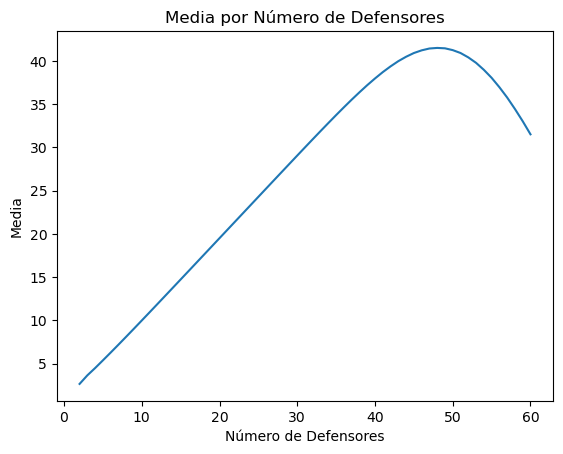

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Creamos una tabla pivote a partir del DataFrame
table = pd.pivot_table(dfpb, values='Derivada_Parcial_Numero_Defensores', index='Numero_Atacantes', columns='Numero_Defensores')

# Listas para almacenar los valores de media y número de defensores
media_values = []
defensores_values = []

# Calcular la media para cada número de defensores
for defenders in table.columns:
    media = np.dot(table.index, table[defenders].values)
    media_values.append(media)
    defensores_values.append(defenders)

# Graficar la media por número de defensores
plt.plot(defensores_values, media_values)
plt.xlabel('Número de Defensores')
plt.ylabel('Media')
plt.title('Media por Número de Defensores')
plt.show()


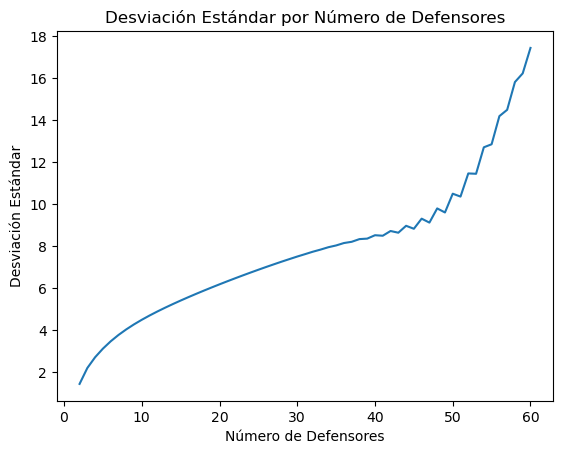

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Creamos una tabla pivote a partir del DataFrame
table = pd.pivot_table(dfpb, values='Derivada_Parcial_Numero_Defensores', index='Numero_Atacantes', columns='Numero_Defensores')

# Listas para almacenar los valores de desviación estándar y número de defensores
desviacion_values = []
defensores_values = []

# Calcular la desviación estándar para cada número de defensores
for defenders in table.columns:
    media = np.dot(table.index, table[defenders].values)
    desviacion = np.sqrt(np.dot((table.index - media) ** 2, table[defenders].values))
    desviacion_values.append(desviacion)
    defensores_values.append(defenders)

# Graficar la desviación estándar por número de defensores
plt.plot(defensores_values, desviacion_values)
plt.xlabel('Número de Defensores')
plt.ylabel('Desviación Estándar')
plt.title('Desviación Estándar por Número de Defensores')
plt.show()


In [17]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from scipy.stats import gamma

# Creamos un DataFrame de ejemplo
dfpb = df

def update_graph(defenders):
    # Creamos una tabla pivote a partir del DataFrame
    table = pd.pivot_table(dfpb, values='Derivada_Parcial_Numero_Defensores', index='Numero_Atacantes', columns='Numero_Defensores')

    df_fijo = table[defenders]
    
    # Gráfica original
    fig = go.Figure(data=go.Scatter(x=df_fijo.index, y=df_fijo.values, mode='lines', name='Función original'))
    
    # Calcular los parámetros de ajuste de la distribución gamma
    media = np.dot(table.index, table[defenders].values)+1
    varianza = np.dot((table.index - media) ** 2, table[defenders].values)
    k = media**2 / varianza
    theta = varianza / media
    
    # Ajuste de una distribución gamma a los datos
    x_fit = np.linspace(1, 60, 100)
    y_fit = gamma.pdf(x_fit, k, scale=theta)
    
    # Actualizar los datos de la curva de ajuste gamma
    if 'Ajuste Gamma' in [trace.name for trace in fig.data]:
        fig.update_traces(x=x_fit, y=y_fit, selector=dict(name='Ajuste Gamma'))
    else:
        fig.add_trace(go.Scatter(x=x_fit, y=y_fit, mode='lines', name='Ajuste Gamma'))
    
    fig.update_layout(
        title='Derivada_Parcial_Numero_Defensores (Número de Defensores Fijo)',
        xaxis=dict(title='Numero_Atacantes'),
        yaxis=dict(title='Derivada_Parcial_Numero_Defensores')
    )
    fig.show()
    
    print(f"Media del ajuste: {media}")
    print(f"Desviación del ajuste: {np.sqrt(varianza)}")
    print(f"k del ajuste: {k}")
    print(f"theta del ajuste: {theta}")
    print(df_fijo)
    
defenders_slider = widgets.IntSlider(min=dfpb['Numero_Defensores'].min(), max=dfpb['Numero_Defensores'].max(), value=10, description='Defensores')

# Crear el widget interactivo
widget = widgets.interactive(update_graph, defenders=defenders_slider)

# Mostrar el deslizador y el gráfico
display(widget)


interactive(children=(IntSlider(value=10, description='Defensores', max=60), Output()), _dom_classes=('widget-…

In [18]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from scipy.stats import gamma, kstest

# Creamos un DataFrame de ejemplo
dfpb = df

def update_graph(defenders):
    # Creamos una tabla pivote a partir del DataFrame
    table = pd.pivot_table(dfpb, values='Derivada_Parcial_Numero_Defensores', index='Numero_Atacantes', columns='Numero_Defensores')

    df_fijo = table[defenders]
    
    # Gráfica original
    fig = go.Figure(data=go.Scatter(x=df_fijo.index, y=df_fijo.values, mode='lines', name='Función original'))
    
    # Calcular los parámetros de ajuste de la distribución gamma
    media = np.dot(table.index, table[defenders].values)+1
    varianza = np.dot((table.index - media) ** 2, table[defenders].values)
    k = media**2 / varianza
    theta = varianza / media
    
    # Ajuste de una distribución gamma a los datos
    x_fit = np.linspace(1, 60, 100)
    y_fit = gamma.pdf(x_fit, k, scale=theta)
    
    # Actualizar los datos de la curva de ajuste gamma
    if 'Ajuste Gamma' in [trace.name for trace in fig.data]:
        fig.update_traces(x=x_fit, y=y_fit, selector=dict(name='Ajuste Gamma'))
    else:
        fig.add_trace(go.Scatter(x=x_fit, y=y_fit, mode='lines', name='Ajuste Gamma'))
    
    fig.update_layout(
        title='Derivada_Parcial_Numero_Defensores (Número de Defensores Fijo)',
        xaxis=dict(title='Numero_Atacantes'),
        yaxis=dict(title='Derivada_Parcial_Numero_Defensores')
    )
    fig.show()
    
    # Prueba de Kolmogorov-Smirnov
    ks_statistic, ks_pvalue = kstest(df_fijo, 'gamma', args=(k, 0, theta))
    
    # Evaluar el resultado de la prueba
    if ks_pvalue < 0.05:
        evaluation = 'Ajuste malo'
    elif ks_pvalue < 0.1:
        evaluation = 'Ajuste bueno'
    else:
        evaluation = 'Ajuste excelente'
    
    print(f"Media del ajuste: {media}")
    print(f"Desviación del ajuste: {np.sqrt(varianza)}")
    print(f"k del ajuste: {k}")
    print(f"theta del ajuste: {theta}")
    print(f"Valor de la prueba de Kolmogorov-Smirnov: {ks_statistic}")
    print(f"Valor p de la prueba de Kolmogorov-Smirnov: {ks_pvalue}")
    print(f"Evaluación del ajuste: {evaluation}")
    print(df_fijo)
    
defenders_slider = widgets.IntSlider(min=dfpb['Numero_Defensores'].min(), max=dfpb['Numero_Defensores'].max(), value=10, description='Defensores')

# Crear el widget interactivo
widget = widgets.interactive(update_graph, defenders=defenders_slider)

# Mostrar el deslizador y el gráfico
display(widget)


interactive(children=(IntSlider(value=10, description='Defensores', max=60), Output()), _dom_classes=('widget-…

In [19]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from scipy.optimize import minimize
from scipy.stats import gamma, kstest

# Creamos un DataFrame de ejemplo
dfpb = df

def maximum_likelihood(params, data):
    # Función de verosimilitud para la distribución gamma
    k, theta = params
    likelihood = np.sum(gamma.logpdf(data, k, scale=theta))
    return -likelihood  # Se utiliza el signo negativo para convertir en un problema de maximización

def update_graph(defenders):
    # Creamos una tabla pivote a partir del DataFrame
    table = pd.pivot_table(dfpb, values='Derivada_Parcial_Numero_Defensores', index='Numero_Atacantes', columns='Numero_Defensores')

    df_fijo = table[defenders]

    # Optimización de la máxima verosimilitud para encontrar los parámetros de la distribución gamma
    result = minimize(maximum_likelihood, x0=[1, 1], args=(df_fijo.values,), method='Nelder-Mead')
    k, theta = result.x

    # Gráfica original
    fig = go.Figure(data=go.Scatter(x=df_fijo.index, y=df_fijo.values, mode='lines', name='Función original'))

    # Ajuste de una distribución gamma a los datos
    x_fit = np.linspace(1, 60, 100)
    y_fit = gamma.pdf(x_fit, k, scale=theta)

    # Actualizar los datos de la curva de ajuste gamma
    if 'Ajuste Gamma' in [trace.name for trace in fig.data]:
        fig.update_traces(x=x_fit, y=y_fit, selector=dict(name='Ajuste Gamma'))
    else:
        fig.add_trace(go.Scatter(x=x_fit, y=y_fit, mode='lines', name='Ajuste Gamma'))

    fig.update_layout(
        title='Derivada_Parcial_Numero_Defensores (Número de Defensores Fijo)',
        xaxis=dict(title='Numero_Atacantes'),
        yaxis=dict(title='Derivada_Parcial_Numero_Defensores')
    )
    fig.show()

    # Prueba de Kolmogorov-Smirnov
    ks_statistic, ks_pvalue = kstest(df_fijo.values, 'gamma', args=(k, 0, theta))

    # Evaluar el resultado de la prueba
    if ks_pvalue < 0.05:
        evaluation = 'Ajuste malo'
    elif ks_pvalue < 0.1:
        evaluation = 'Ajuste bueno'
    else:
        evaluation = 'Ajuste excelente'

    print(f"Media del ajuste: {k * theta}")
    print(f"Desviación del ajuste: {np.sqrt(k * theta**2)}")
    print(f"k del ajuste: {k}")
    print(f"theta del ajuste: {theta}")
    print(f"Valor de la prueba de Kolmogorov-Smirnov: {ks_statistic}")
    print(f"Valor p de la prueba de Kolmogorov-Smirnov: {ks_pvalue}")
    print(f"Evaluación del ajuste: {evaluation}")
    print(df_fijo)

defenders_slider = widgets.IntSlider(min=dfpb['Numero_Defensores'].min(), max=dfpb['Numero_Defensores'].max(), value=10, description='Defensores')

# Crear el widget interactivo
widget = widgets.interactive(update_graph, defenders=defenders_slider)

# Mostrar el deslizador y el gráfico
display(widget)


interactive(children=(IntSlider(value=10, description='Defensores', max=60), Output()), _dom_classes=('widget-…

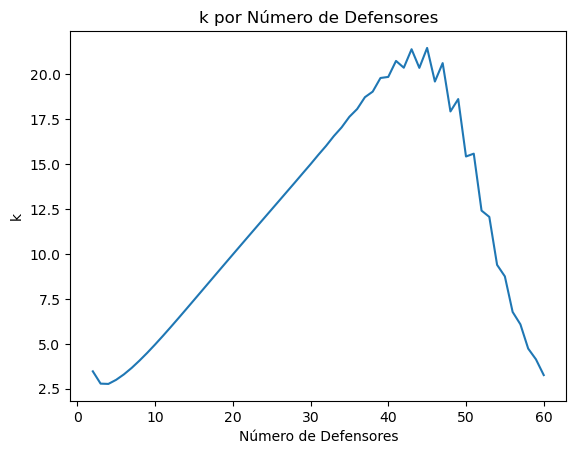

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Creamos una tabla pivote a partir del DataFrame
table = pd.pivot_table(dfpb, values='Derivada_Parcial_Numero_Defensores', index='Numero_Atacantes', columns='Numero_Defensores')

# Listas para almacenar los valores de media y número de defensores
k_values = []
defensores_values = []

# Calcular la media para cada número de defensores
for defenders in table.columns:
    media = np.dot(table.index, table[defenders].values)
    desviacion = np.sqrt(np.dot((table.index - media) ** 2, table[defenders].values))
    varianza = desviacion**2
    k = media**2 / varianza
    theta = varianza / media
    k_values.append(k)
    defensores_values.append(defenders)

# Graficar la media por número de defensores
plt.plot(defensores_values, k_values)
plt.xlabel('Número de Defensores')
plt.ylabel('k')
plt.title('k por Número de Defensores')
plt.show()

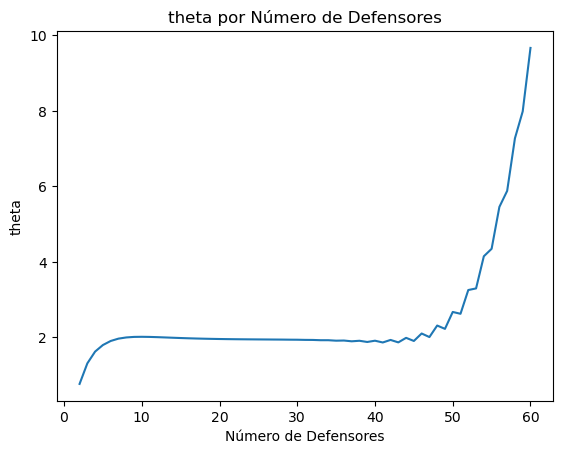

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Creamos una tabla pivote a partir del DataFrame
table = pd.pivot_table(dfpb, values='Derivada_Parcial_Numero_Defensores', index='Numero_Atacantes', columns='Numero_Defensores')

# Listas para almacenar los valores de media y número de defensores
theta_values = []
defensores_values = []

# Calcular la media para cada número de defensores
for defenders in table.columns:
    media = np.dot(table.index, table[defenders].values)
    desviacion = np.sqrt(np.dot((table.index - media) ** 2, table[defenders].values))
    varianza = desviacion**2
    k = media**2 / varianza
    theta = varianza / media
    theta_values.append(theta)
    defensores_values.append(defenders)

# Graficar la media por número de defensores
plt.plot(defensores_values, theta_values)
plt.xlabel('Número de Defensores')
plt.ylabel('theta')
plt.title('theta por Número de Defensores')
plt.show()

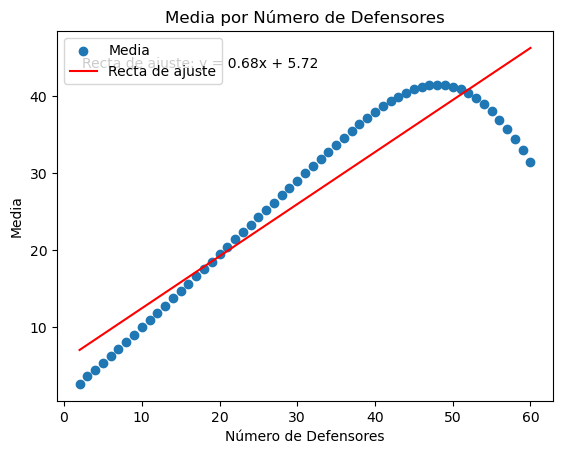

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Creamos una tabla pivote a partir del DataFrame
table = pd.pivot_table(dfpb, values='Derivada_Parcial_Numero_Defensores', index='Numero_Atacantes', columns='Numero_Defensores')

# Listas para almacenar los valores de media y número de defensores
media_values = []
defensores_values = []

# Calcular la media para cada número de defensores
for defenders in table.columns:
    media = np.dot(table.index, table[defenders].values)
    media_values.append(media)
    defensores_values.append(defenders)

# Función lineal para ajustar
def linear_func(x, m, c):
    return m * x + c

# Eliminar los valores infinitos y NaN de los datos
media_values = np.array(media_values)
defensores_values = np.array(defensores_values)
valid_indices = np.isfinite(media_values) & np.isfinite(defensores_values)
media_values = media_values[valid_indices]
defensores_values = defensores_values[valid_indices]

# Ajustar la recta utilizando curve_fit
params, _ = curve_fit(linear_func, defensores_values, media_values)

# Obtener los parámetros del ajuste
m, c = params

# Calcular los valores de la recta ajustada
line_values = linear_func(defensores_values, m, c)

# Graficar los puntos de la media y la recta ajustada
plt.scatter(defensores_values, media_values, label='Media')
plt.plot(defensores_values, line_values, 'r-', label='Recta de ajuste')
plt.xlabel('Número de Defensores')
plt.ylabel('Media')
plt.title('Media por Número de Defensores')
plt.legend()

# Mostrar la ecuación de la recta y el valor de R² en la gráfica
equation = f'Recta de ajuste: y = {m:.2f}x + {c:.2f}'
plt.text(0.05, 0.9, equation, transform=plt.gca().transAxes)

plt.show()


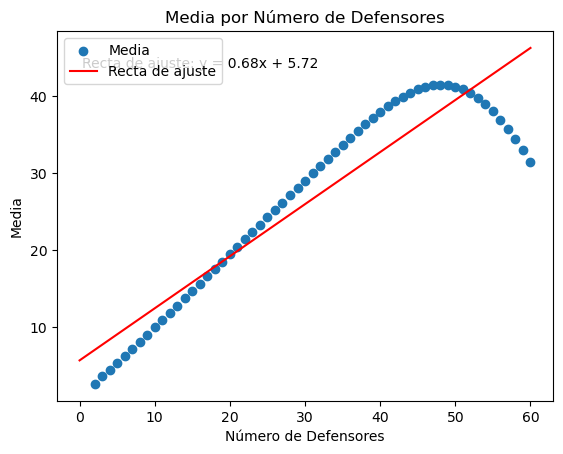

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Creamos una tabla pivote a partir del DataFrame
table = pd.pivot_table(dfpb, values='Derivada_Parcial_Numero_Defensores', index='Numero_Atacantes', columns='Numero_Defensores')

# Listas para almacenar los valores de media y número de defensores
media_values = []
defensores_values = []

# Calcular la media para cada número de defensores
for defenders in table.columns:
    media = np.dot(table.index, table[defenders].values)
    media_values.append(media)
    defensores_values.append(defenders)

# Función lineal para ajustar
def linear_func(x, m, c):
    return m * x + c

# Eliminar los valores infinitos y NaN de los datos
media_values = np.array(media_values)
defensores_values = np.array(defensores_values)
valid_indices = np.isfinite(media_values) & np.isfinite(defensores_values)
media_values = media_values[valid_indices]
defensores_values = defensores_values[valid_indices]

# Ajustar la recta utilizando curve_fit
params, _ = curve_fit(linear_func, defensores_values, media_values)

# Obtener los parámetros del ajuste
m, c = params

# Definir los valores de defensores desde cero hasta 40
defensores_values_extended = np.arange(0, 61)

# Calcular los valores de la recta ajustada
line_values = linear_func(defensores_values_extended, m, c)

# Graficar los puntos de la media y la recta ajustada
plt.scatter(defensores_values, media_values, label='Media')
plt.plot(defensores_values_extended, line_values, 'r-', label='Recta de ajuste')
plt.xlabel('Número de Defensores')
plt.ylabel('Media')
plt.title('Media por Número de Defensores')
plt.legend()

# Mostrar la ecuación de la recta y el valor de R² en la gráfica
equation = f'Recta de ajuste: y = {m:.2f}x + {c:.2f}'
plt.text(0.05, 0.9, equation, transform=plt.gca().transAxes)

plt.show()


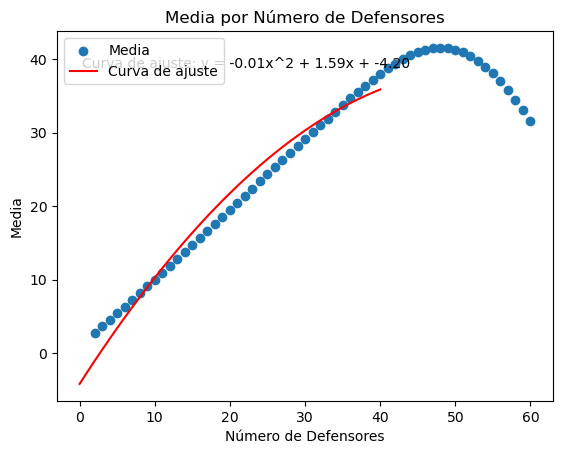

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Creamos una tabla pivote a partir del DataFrame
table = pd.pivot_table(dfpb, values='Derivada_Parcial_Numero_Defensores', index='Numero_Atacantes', columns='Numero_Defensores')

# Listas para almacenar los valores de media y número de defensores
media_values = []
defensores_values = []

# Calcular la media para cada número de defensores
for defenders in table.columns:
    media = np.dot(table.index, table[defenders].values)
    media_values.append(media)
    defensores_values.append(defenders)

# Función cuadrática para ajustar
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

# Eliminar los valores infinitos y NaN de los datos
media_values = np.array(media_values)
defensores_values = np.array(defensores_values)
valid_indices = np.isfinite(media_values) & np.isfinite(defensores_values)
media_values = media_values[valid_indices]
defensores_values = defensores_values[valid_indices]

# Ajustar la curva utilizando curve_fit
params, _ = curve_fit(quadratic_func, defensores_values, media_values)

# Obtener los parámetros del ajuste
a, b, c = params

# Definir los valores de defensores desde cero hasta 40
defensores_values_extended = np.arange(0, 41)

# Calcular los valores de la curva ajustada
curve_values = quadratic_func(defensores_values_extended, a, b, c)

# Graficar los puntos de la media y la curva ajustada
plt.scatter(defensores_values, media_values, label='Media')
plt.plot(defensores_values_extended, curve_values, 'r-', label='Curva de ajuste')
plt.xlabel('Número de Defensores')
plt.ylabel('Media')
plt.title('Media por Número de Defensores')
plt.legend()

# Mostrar la ecuación de la curva y el valor de R² en la gráfica
equation = f'Curva de ajuste: y = {a:.2f}x^2 + {b:.2f}x + {c:.2f}'
plt.text(0.05, 0.9, equation, transform=plt.gca().transAxes)

plt.show()
